In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset
#### https://mitu.co.in/dataset

In [3]:
df_resume = pd.read_csv('UpdatedResumeDataSet.csv')
df_resume

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
df_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
df_resume.Category.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [8]:
print(df_resume.iloc[0]['Resume'])

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

### Splitting the features and targets

In [9]:
X = df_resume['Resume']
y = df_resume['Category']


<Axes: xlabel='count', ylabel='Category'>

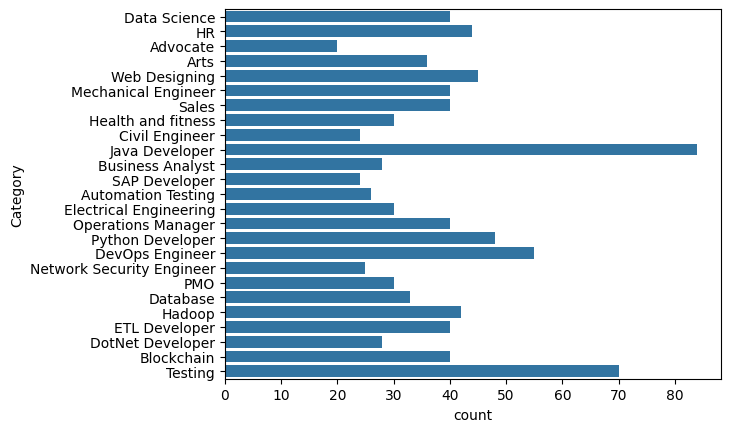

In [21]:
sns.countplot(y=y)

In [16]:
len(y.value_counts()) # total number of classes

25

([<matplotlib.patches.Wedge at 0x210e8b355b0>,
 [Text(1.058871228953308, 0.29797939609125923, 'Java Developer'),
  Text(0.7841417468169058, 0.7714413269322118, 'Testing'),
  Text(0.4134731563409379, 1.0193330903024107, 'DevOps Engineer'),
  Text(0.053862331076050214, 1.098680503736666, 'Python Developer'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'HR'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Hadoop'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Blockchain'),
  Text(-1.0745482070561094, 0.23525762625789806, 'ETL Developer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Operations Manager'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Data Science'),
  Text(-0.9271404102234844, -0.5919549473825093, 'Sales'),
  Text(-0.7427813690411197, -0.811341998053472, 'Mechanical Engineer'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Arts'),
  Text(-0.291057286964679, -1.0607948226234707, 'Datab

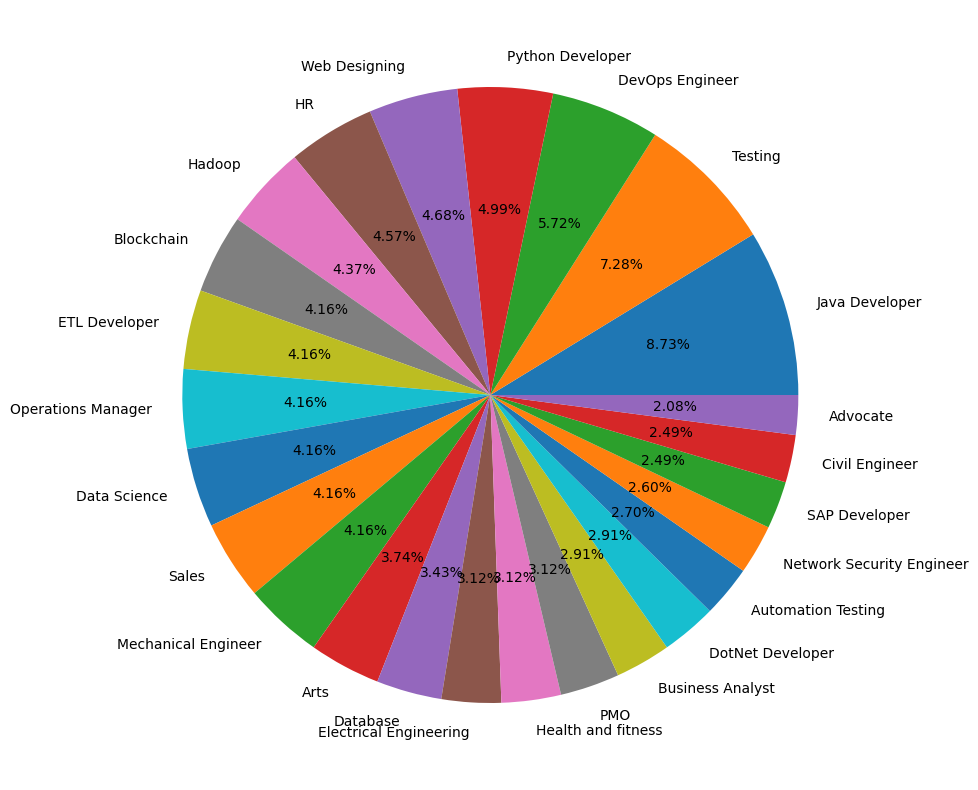

In [26]:
plt.figure(figsize=(10,10))
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%')

## Using regular expressions for cleaning the data

In [28]:
import re
import string

In [ ]:
def cleanResume(resumeText):
    resumeText = re.sub(r'http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub(r'RT|cc', ' ',resumeText) # remove RT and cc
    resumeText = re.sub(r'#\S+', ' ', resumeText) # remove hastags
    resumeText = re.sub(r'@\S+' ,' ', resumeText) # remove mentions
    resumeText = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', resumeText) # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]', ' ', resumeText) # remove hexadecimal characters
    resumeText = re.sub(r'\s+', ' ', resumeText) # remove extra whitespaces and replace with spaces
    return resumeText

In [33]:
# testing the function
cleanedResume = cleanResume(X[0])
cleanedResume

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [39]:
# applying the function to the actual messages in the dataframe X
cleandata = X.apply(cleanResume)
cleandata = list(cleandata)
cleandata

['Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the

In [41]:
# collecting all the messages into a single string
cleandata_str = ' '.join(cleandata)
len(cleandata_str)

2804342

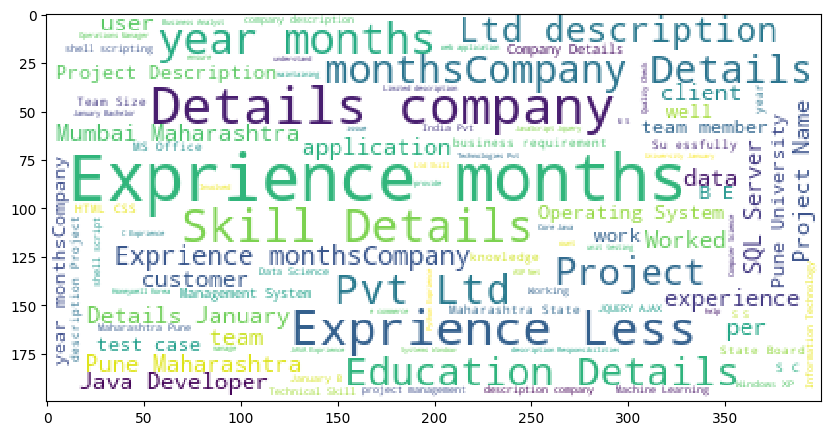

In [51]:
from wordcloud import WordCloud
wcloud = WordCloud(background_color='white').generate(cleandata_str)
plt.figure(figsize=(10,9))
plt.imshow(wcloud, interpolation='nearest')


In [53]:
cleaned = X.apply(cleanResume)
cleaned

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [54]:
##### TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english') # can just enter stop_words language here
vectorized_data = tfidf.fit_transform(cleaned)

In [55]:
vectorized_data

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [56]:
vectorized_data.shape

(962, 7351)

In [57]:
tfidf.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'], dtype=object)

### Cross validation

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, y, random_state=0)
X_train.shape, X_test.shape

((721, 7351), (241, 7351))

### Build the model

In [62]:
from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()

nc.fit(X_train, y_train)

NearestCentroid()

In [75]:
## validation
y_pred = nc.predict(X_test)

In [76]:
# Evaluation of the model
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         3
       Automation Testing       0.83      0.83      0.83         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00        10
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.85      0.92        13
         DotNet Developer       1.00      1.00      1.00        10
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       0.91      1.00      0.95        10
                       HR       1.00      1.00      1.00         8
                   Hadoop       1.00      1.00      1.00     

0.9875518672199171

In [77]:
len(nc.centroids_) # number of centroids=number of classes

25

In [78]:
nc.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

<Figure size 3000x1500 with 0 Axes>

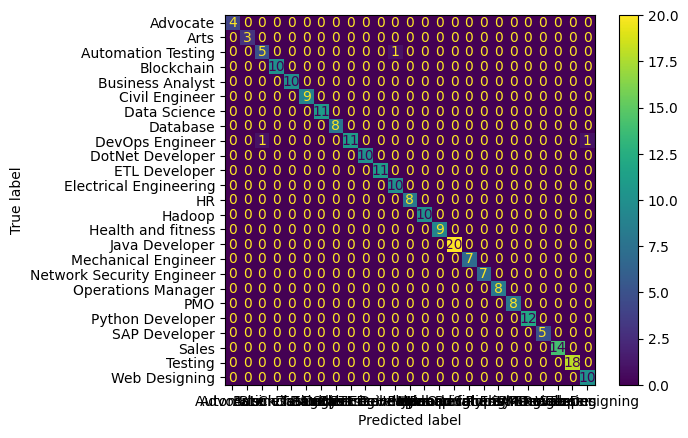

In [79]:
plt.figure(figsize=(30,15))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### Prediction on unknown data
#### file: Sample_Resume.txt
#### Location: https://mitu.co.in/dataset

In [87]:
with open('Sample_resume.txt', 'r') as f:
    sample_resume = f.read()
print(sample_resume)

Tejashree Pishe 
Jr. Machine Learning Engineer. (MITU Research) 
EXPERIENCE 
MITU Research, New Sangavi, Pune 
 Feb 2021 till date 
Hiko Technology Pvt. Ltd., Baner, Pune Full Time Internship 
August 2019 May 2020. 
 
KEY PROJECTS 
Predictive Analytics Implemented for Pistachio Types over quality parameter database
Study the origin, trade business and nutritional values over Pistachio types.
Review the quality of pistachio types over its quality  
pararameters.
Critically evaluate and data preprocessing over the database.
Used the Resampling techniques to work on imbalanced data set.
Identify the quality parameters which has more impact on classification of Pistachio types by quantitative analysis.
Find out the best suitable algorithm with more than 90% accuracy to predict the type of pistachio over new data.
Updating and upgrading the model with non-predictable data.
Technologies: Python for Data Science, NumPY, Panda,
Machine Learning Algorithms 
 
Design and development of Decision 

In [86]:
cleaned_sample = cleanResume(sample_resume)
cleaned_sample

'Tejashree Pishe Jr Machine Learning Engineer MITU Research EXPERIENCE MITU Research New Sangavi Pune Feb 2021 till date Hiko Technology Pvt Ltd Baner Pune Full Time Internship August 2019 May 2020 KEY PROJECTS Predictive Analytics Implemented for Pistachio Types over quality parameter database Study the origin trade business and nutritional values over Pistachio types Review the quality of pistachio types over its quality pararameters Critically evaluate and data preprocessing over the database Used the Resampling techniques to work on imbalanced data set Identify the quality parameters which has more impact on classification of Pistachio types by quantitative analysis Find out the best suitable algorithm with more than 90 a uracy to predict the type of pistachio over new data Updating and upgrading the model with non predictable data Technologies Python for Data Science NumPY Panda Machine Learning Algorithms Design and development of Decision support System for selection of New Resu

In [88]:
resume_tfidf = tfidf.transform([cleaned_sample])


In [89]:
resume_tfidf

<1x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 179 stored elements in Compressed Sparse Row format>

In [90]:
nc.predict(resume_tfidf) # predicting the title for this resume

array(['Data Science'], dtype=object)